In [91]:
%config Completer.use_jedi = False

In [92]:
# %pip install yellowbrick

In [154]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import dtale
from scipy.spatial import distance_matrix
from ipywidgets import interact, interactive, fixed, interact_manual

from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler
from sklearn.cluster import KMeans,AgglomerativeClustering, FeatureAgglomeration, AffinityPropagation
from yellowbrick.cluster import KElbowVisualizer
from sklearn.decomposition import PCA
from sklearn.metrics.cluster import completeness_score,rand_score,homogeneity_score



from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import inconsistent

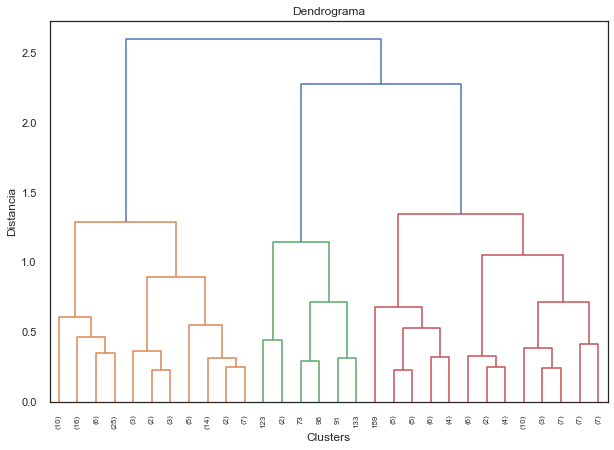

In [94]:
data = pd.read_csv('D:/Downloads/Country-data.csv')
X = np.array([data['income'],data['health'], data['exports']]).T
minmax = MinMaxScaler()
minmax = minmax.fit(X)
X_scaled = minmax.fit_transform(X)

%matplotlib inline
Z = linkage(X_scaled,method='ward')
# Que pasa si usamos las variables escaladas?

plt.figure(figsize=(10,7))

dendrogram(Z,leaf_rotation = 90., leaf_font_size = 8.0, show_contracted=False,
          truncate_mode ='lastp', show_leaf_counts=True)
plt.title('Dendrograma')
plt.xlabel('Clusters')
plt.ylabel('Distancia')
plt.show()

***
___

***
___

## Clustering jerárquico con Sklearn

In [1]:
clustering_jer = AgglomerativeClustering(n_clusters=3,linkage='ward',compute_distances=True).fit(X)
clustering_jer.labels_

NameError: name 'AgglomerativeClustering' is not defined

In [96]:
data2 = data.copy()
data2['Jerar'] = clustering_jer.labels_

In [97]:
data2.groupby(['Jerar','country'])[['income','exports','health']].agg(lambda x: x)

income  exports  health
Jerar country                                      
0     Afghanistan             1610     10.0    7.58
      Albania                 9930     28.0    6.55
      Algeria                12900     38.4    4.17
      Angola                  5900     62.3    2.85
      Antigua and Barbuda    19100     45.5    6.03
...                            ...      ...     ...
2     Sweden                 42900     46.2    9.63
      Switzerland            55500     64.0   11.50
      United Arab Emirates   57600     77.7    3.66
      United Kingdom         36200     28.2    9.64
      United States          49400     12.4   17.90

[167 rows x 3 columns]

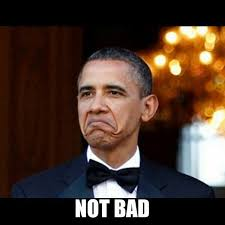

# ¿Cuál es el número de clusters óptimo?

### Método del códo

El método del códo es un heurísitca que consiste en calcular el cluster en el que los rendimientos decrecientes de las distancias  ya no justifican el costo de una agrupación adicional

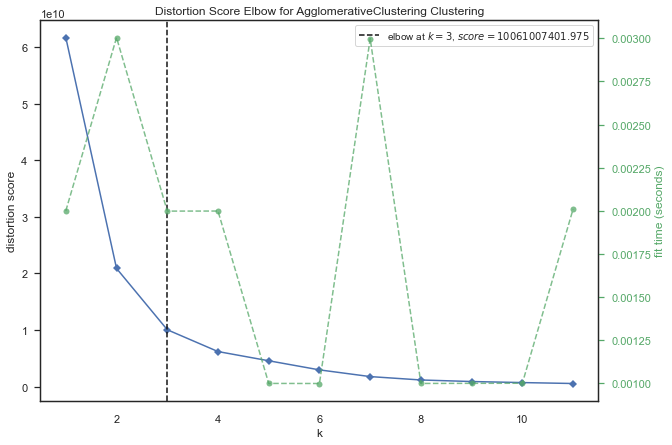

In [98]:
visualizer = KElbowVisualizer(clustering_jer, k=(10))


fig = plt.figure(figsize=(10,7))
visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()  
plt.show()

<IPython.core.display.Javascript object>


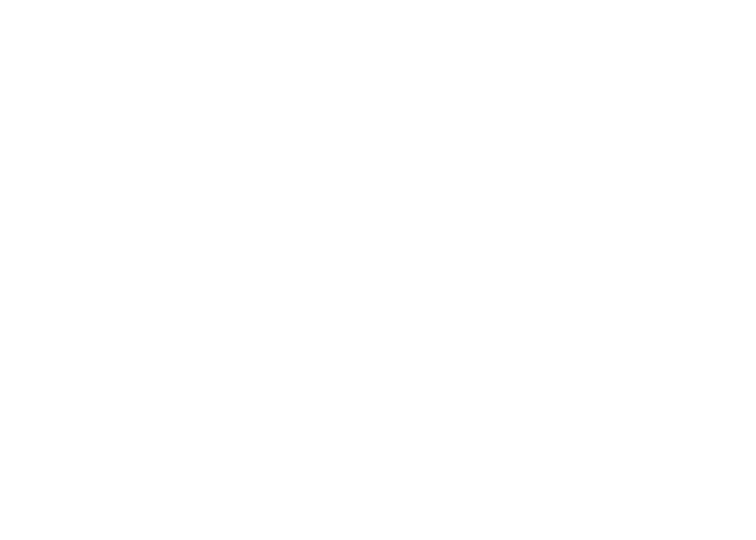

In [99]:
%matplotlib notebook
def col(x):
    if x == 0:
        c = 'lime'
    elif x == 1:
        c = 'orange'
    else:
        c = 'cyan'
    return c

fig = plt.figure(figsize=(7,5))
sns.set(style = "white")
ax = fig.add_subplot(111,projection = '3d')
ax.scatter(X[:,0],X[:,1],X[:,2],c=data2['Jerar'].apply(col))
ax.set_xlabel('income')
ax.set_ylabel('health')
ax.set_zlabel('exports')
ax.grid(False)
plt.show()

***
___

# Clustering con K-means

El método de k-means intenta minimizar la distancia al cuaadrado de cada elemento su centroide respectivo

$$wcss = \sum_{j=1}^{k}\sum_{x_{i}\in C_{j}}(x_{i}-c_{j})^{2}$$

tal que $c_{j}$ es el Centroide del cluster $j$

In [100]:
kmeans = KMeans(n_clusters=3).fit(X)
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 0, 2, 2, 2, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 2, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 2, 1, 0, 2, 0, 0, 2, 0, 0, 0,
       0, 1, 2, 2, 0, 0, 2, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0])

In [101]:
data2['Kmeans'] = kmeans.labels_

In [102]:
data2['diff'] = data2['Jerar'] - data2['Kmeans']

In [103]:
data2.groupby(['Kmeans','country'])[['income','exports','health']].agg(lambda x: x)

income  exports  health
Kmeans country                                      
0      Afghanistan             1610     10.0    7.58
       Albania                 9930     28.0    6.55
       Algeria                12900     38.4    4.17
       Angola                  5900     62.3    2.85
       Antigua and Barbuda    19100     45.5    6.03
...                             ...      ...     ...
2      Sweden                 42900     46.2    9.63
       Switzerland            55500     64.0   11.50
       United Arab Emirates   57600     77.7    3.66
       United Kingdom         36200     28.2    9.64
       United States          49400     12.4   17.90

[167 rows x 3 columns]

C:\Users\ASUS\AppData\Roaming\Python\Python37\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



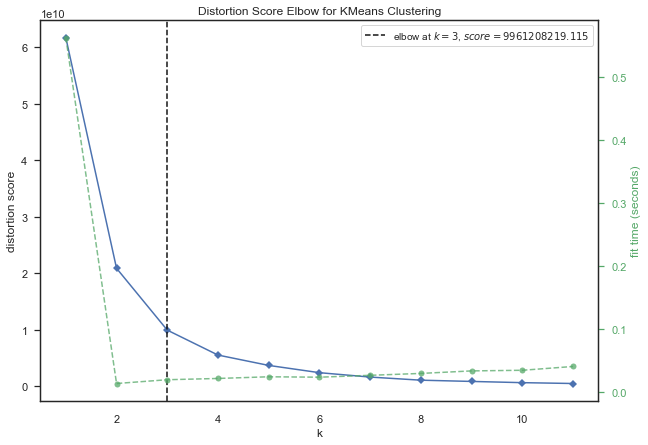

In [104]:
%matplotlib inline
visualizer = KElbowVisualizer(kmeans, k=(1,12))
fig = plt.figure(figsize=(10,7))
visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()  
plt.show()

<IPython.core.display.Javascript object>


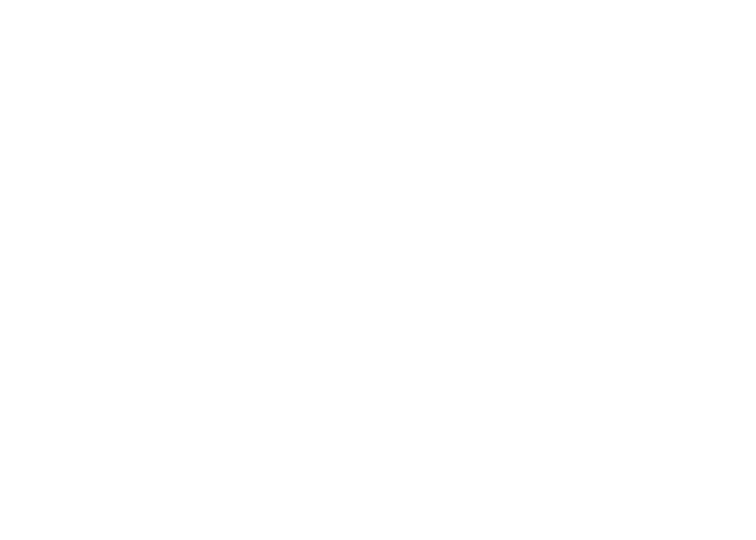

In [105]:
%matplotlib notebook
def col(x):
    if x == 0:
        c = 'lime'
    elif x == 1:
        c = 'cyan'
    else:
        c = 'orange'
    return c

fig = plt.figure(figsize=(7,5))
sns.set(style = "white")
ax = fig.add_subplot(111,projection = '3d')
ax.scatter(X[:,0],X[:,1],X[:,2],c=data2['Kmeans'].apply(col))
ax.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],kmeans.cluster_centers_[:,1],
          c = 'r',s=100)
ax.set_xlabel('income')
ax.set_ylabel('health')
ax.set_zlabel('exports')
ax.grid(False)
plt.show()

## Propagación de afinidad

In [106]:
X = np.array([data['exports'],data['health']]).T

pa =  AffinityPropagation(preference=-1500, random_state=14).fit(X)

cluster_centers_indices = pa.cluster_centers_indices_
labels = pa.labels_

n_clusters_= len(cluster_centers_indices)

<IPython.core.display.Javascript object>


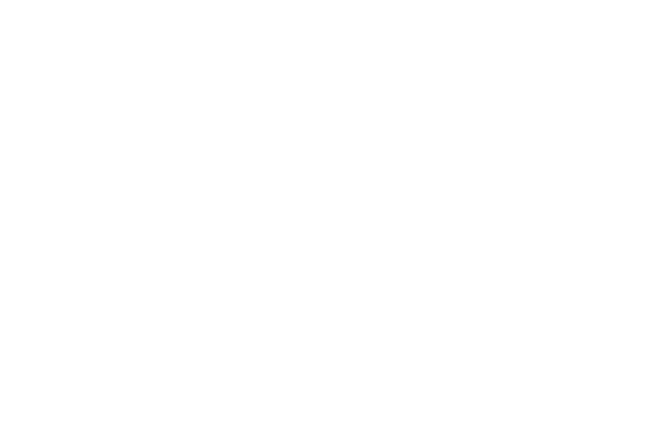

In [107]:
import matplotlib.pyplot as plt
from itertools import cycle

fig = plt.figure()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X[cluster_centers_indices[k]]
    plt.plot(X[class_members, 0], X[class_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=10)
    for x in X[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

***
____

***
____

# Reducción de Dimensionalidad

¿Que variables predictoras son útiles?

### Analisis de componentes principales (ACP o PCA)

In [113]:
X2 = np.array(data.iloc[:,1:])

stand = StandardScaler()
stand = stand.fit(X2)
X_std = stand.fit_transform(X2)

cov_mat = np.cov(X_std.T)
pd.DataFrame(cov_mat)

,0,1,2,3,4,5,6,7,8
0,1.006024,-0.320009,-0.201609,-0.127977,-0.527474,0.290013,-0.892018,0.853589,-0.485942
1,-0.320009,1.006024,-0.115098,0.741823,0.519897,-0.107941,0.318218,-0.321938,0.421247
2,-0.201609,-0.115098,1.006024,0.096293,0.130359,-0.256914,0.211961,-0.197859,0.348050
3,-0.127977,0.741823,0.096293,1.006024,0.123144,-0.248482,0.054718,-0.160007,0.116194
4,-0.527474,0.519897,0.130359,0.123144,1.006024,-0.148646,0.615649,-0.504863,0.900966
5,0.290013,-0.107941,-0.256914,-0.248482,-0.148646,1.006024,-0.241149,0.318830,-0.222966
6,-0.892018,0.318218,0.211961,0.054718,0.615649,-0.241149,1.006024,-0.765458,0.603704
7,0.853589,-0.321938,-0.197859,-0.160007,-0.504863,0.318830,-0.765458,1.006024,-0.457651
8,-0.485942,0.421247,0.348050,0.116194,0.900966,-0.222966,0.603704,-0.457651,1.006024


# vectores y valores propios

In [114]:
eig_vals,eig_vecs = np.linalg.eig(cov_mat)
print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[-0.41951945  0.19288394 -0.02954353  0.37065326  0.16896968  0.20062815
   0.3275418   0.68274306 -0.07948854]
 [ 0.28389698  0.61316349  0.14476069  0.00309102 -0.05761584 -0.05933283
  -0.12308207  0.01419742 -0.70730269]
 [ 0.15083782 -0.24308678 -0.59663237  0.4618975  -0.51800037  0.00727646
   0.11308797 -0.07249683 -0.24983051]
 [ 0.16148244  0.67182064 -0.29992674 -0.07190746 -0.25537642 -0.03003154
   0.09903717  0.02894642  0.59218953]
 [ 0.39844111  0.02253553  0.3015475   0.39215904  0.2471496   0.16034699
   0.61298247 -0.35262369  0.09556237]
 [-0.19317293 -0.00840447  0.64251951  0.15044176 -0.7148691   0.06628537
  -0.02523614  0.01153775  0.10463252]
 [ 0.42583938 -0.22270674  0.11391854 -0.20379723 -0.1082198  -0.60112652
   0.29403981  0.50466425  0.01848639]
 [-0.40372896  0.15523311  0.01954925  0.37830365  0.13526221 -0.75068875
  -0.02633585 -0.29335267  0.02882643]
 [ 0.39264482 -0.0460224   0.12297749  0.53199457  0.18016662  0.01677876
  -0.625

In [115]:
#  Hacemos una lista de parejas (vector propio, valorpropio) 
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Ordenamos estas parejas en orden descendente con la función sort
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# # Visualizamos la lista de autovalores en orden desdencente
print('Autovalores en orden descendente:')
for i in eig_pairs:
    print(i[0])

Autovalores en orden descendente:
4.1605701746085675
1.5556616478543457
1.1774338025373785
1.0007772405888318
0.6645986608738872
0.22492799510065725
0.11412210171337578
0.08884737663271053
0.06727786756013163


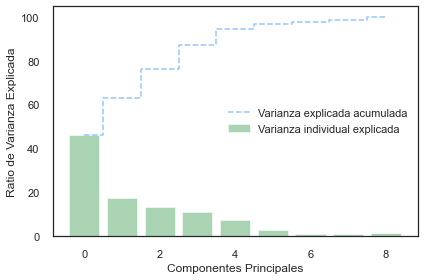

In [117]:
# A partir de los autovalores, calculamos la varianza explicada
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in eig_vals]
cum_var_exp = np.cumsum(var_exp)

# Representamos en un diagrama de barras la varianza explicada por cada autovalor, y la acumulada
%matplotlib inline
with plt.style.context('seaborn-pastel'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(len(eig_pairs)), var_exp, alpha=0.5, align='center',
            label='Varianza individual explicada', color='g')
    plt.step(range(len(eig_pairs)), cum_var_exp, where='mid', linestyle='--', label='Varianza explicada acumulada')
    plt.ylabel('Ratio de Varianza Explicada')
    plt.xlabel('Componentes Principales')
    plt.legend(loc='best')
    plt.tight_layout()

In [118]:
data.iloc[:,1:]

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


***
___

### PCA con sklearn

In [210]:
pca = PCA(n_components=9).fit(X2)
pca.components_.shape # shape (n_components, n_features)

(9, 9)

In [211]:
pca.explained_variance_

array([6.70739440e+08, 3.68465803e+07, 1.25097869e+03, 9.81348399e+02,
       1.35148254e+02, 7.34938583e+01, 1.28824224e+01, 4.23786889e+00,
       6.12008307e-01])

In [212]:
pca.singular_values_ 

array([3.33680606e+05, 7.82082626e+04, 4.55699970e+02, 4.03613471e+02,
       1.49781876e+02, 1.10453522e+02, 4.62437253e+01, 2.65233150e+01,
       1.00793541e+01])

In [213]:
pca.n_components_

9

In [214]:
pca.n_features_

9

***
___

In [215]:
X_pca = pca.fit_transform(X2)

modelo1 = AgglomerativeClustering(compute_distances=True).fit(X_pca)
modelo2 = KMeans().fit(X_pca)
modelo3 = AffinityPropagation(random_state=14).fit(X_pca)

print('Clusters del modelo 1: ', modelo1.n_clusters_)
print('Clusters del modelo 2: ',modelo2.n_clusters)
print('Clusters del modelo 3: ',modelo3.cluster_centers_.shape[0])

Clusters del modelo 1:  2
clusters del modelo 2:  8
Clusters del modelo 3:  14


### Métricas de evaluación en modelos de clustering

In [200]:
X_pred_m1 = modelo1.fit_predict(X_pca)
X_pred_m2 = modelo2.fit_predict(X_pca)
X_pred_m3 = modelo3.fit_predict(X_pca)

for i,m in zip([X_pred_m1,X_pred_m2,X_pred_m3],[1,2,3]):
    print("""
    Modelo: {}
    'rand_score: '{}
    'homogeneity: '{}
    'completeness: '{}
    """.format(m,rand_score(i,modelo1.labels_),homogeneity_score(i,modelo2.labels_),completeness_score(i,modelo3.labels_)))


    Modelo: 1
    'rand_score: '1.0
    'homogeneity: '1.0000000000000004
    'completeness: '0.19362063107487776
    

    Modelo: 2
    'rand_score: '0.5801890195512589
    'homogeneity: '1.0
    'completeness: '0.6416594245038967
    

    Modelo: 3
    'rand_score: '0.4167808960392468
    'homogeneity: '0.6416594245038967
    'completeness: '1.0
    


***
___

## FeatureAgglomeration

In [226]:
agg = FeatureAgglomeration(n_clusters=9).fit(X2)
agg.n_clusters_

9

In [227]:
X_fa = agg.transform(X2)

modelo1 = AgglomerativeClustering(compute_distances=True).fit(X_fa)
modelo2 = KMeans().fit(X_fa)
modelo3 = AffinityPropagation(random_state=14).fit(X_fa)

print('Clusters del modelo 1: ', modelo1.n_clusters_)
print('clusters del modelo 2: ',modelo2.n_clusters)
print('Clusters del modelo 3: ',modelo3.cluster_centers_.shape[0])

Clusters del modelo 1:  2
clusters del modelo 2:  8
Clusters del modelo 3:  14


In [228]:
X_pred_m1 = modelo1.fit_predict(X_fa)
X_pred_m2 = modelo2.fit_predict(X_fa)
X_pred_m3 = modelo3.fit_predict(X_fa)

for i,m in zip([X_pred_m1,X_pred_m2,X_pred_m3],[1,2,3]):
    print("""
    Modelo: {}
    'rand_score: '{}
    'homogeneity: '{}
    'completeness: '{}
    """.format(m,rand_score(i,modelo1.labels_),homogeneity_score(i,modelo2.labels_),completeness_score(i,modelo3.labels_)))


    Modelo: 1
    'rand_score: '1.0
    'homogeneity: '1.0000000000000004
    'completeness: '0.19362063107487776
    

    Modelo: 2
    'rand_score: '0.5801890195512589
    'homogeneity: '1.0
    'completeness: '0.6416594245038967
    

    Modelo: 3
    'rand_score: '0.4167808960392468
    'homogeneity: '0.6416594245038967
    'completeness: '1.0
    


***
___

<h1><center> Gracias!